In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   60    1   3     145   233    1        0       150     0      2.3    0   
1   35    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   55    1   1     120   236    0        1       178     0      0.8    2   
4   56    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  
   chol  sentiment
0   233        233
1   250        250
2   204        204
3   236        236
4   354        354


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\91701\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


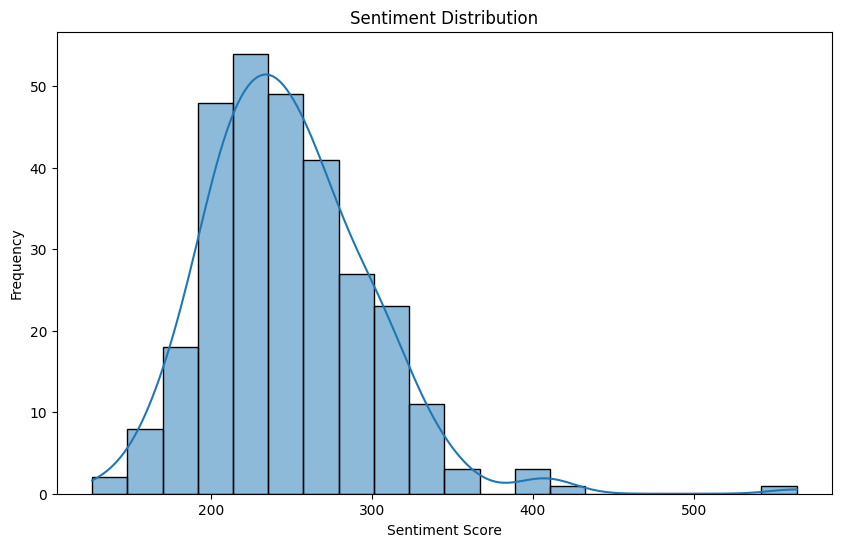

In [11]:

# Load your data
# Assuming you have a CSV file with heart data and a text column for sentiment analysis
data = pd.read_csv('C:\\Users\\91701\\Desktop\\python_ws\\heart.csv',encoding = 'cp1252')

# Display the first few rows of the data
print(data.head())

# Perform text mining and sentiment analysis
# Assuming there is a 'text' column in the dataset for sentiment analysis
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis
data['sentiment'] = data['chol']

# Display sentiment analysis results
print(data[['chol', 'sentiment']].head())

# Visualize sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['sentiment'], bins=20, kde=True)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


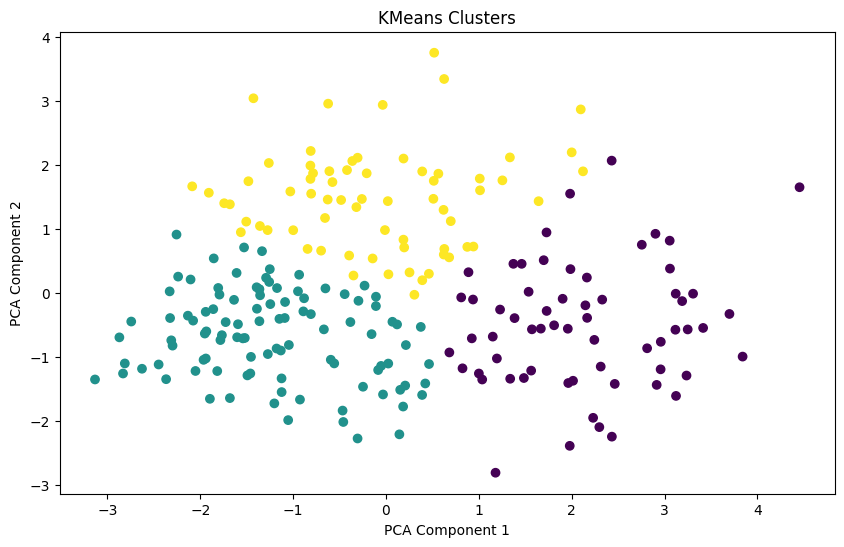

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.87      0.87      0.87        31

    accuracy                           0.86        58
   macro avg       0.86      0.86      0.86        58
weighted avg       0.86      0.86      0.86        58

[[23  4]
 [ 4 27]]


In [8]:

# Perform clustering or classification
# Assuming you have features and a target column for classification
features = data.drop(columns=['output', 'chol', 'sentiment'])
target = data['output']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_pca)

# Predict and visualize clusters
clusters = kmeans.predict(X_train_pca)
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=clusters, cmap='viridis')
plt.title('KMeans Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Classification using a simple model (e.g., Logistic Regression)
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
